## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [2]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [3]:
# Подгружаем наш датасет
df = pd.read_csv('clients.csv')

# Анализ данных

In [4]:
# Проверяем на пустые ячейки
df.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

Судя по тому, что в столбцах "Age at time of purchase", "Age Interval", "Y", "M", "D", "Gender" одинаковое количество пропущенных значений, можем сделать предположение, что это могут пыть пропуски в одних и тех же строках. Необходимо это проверить)

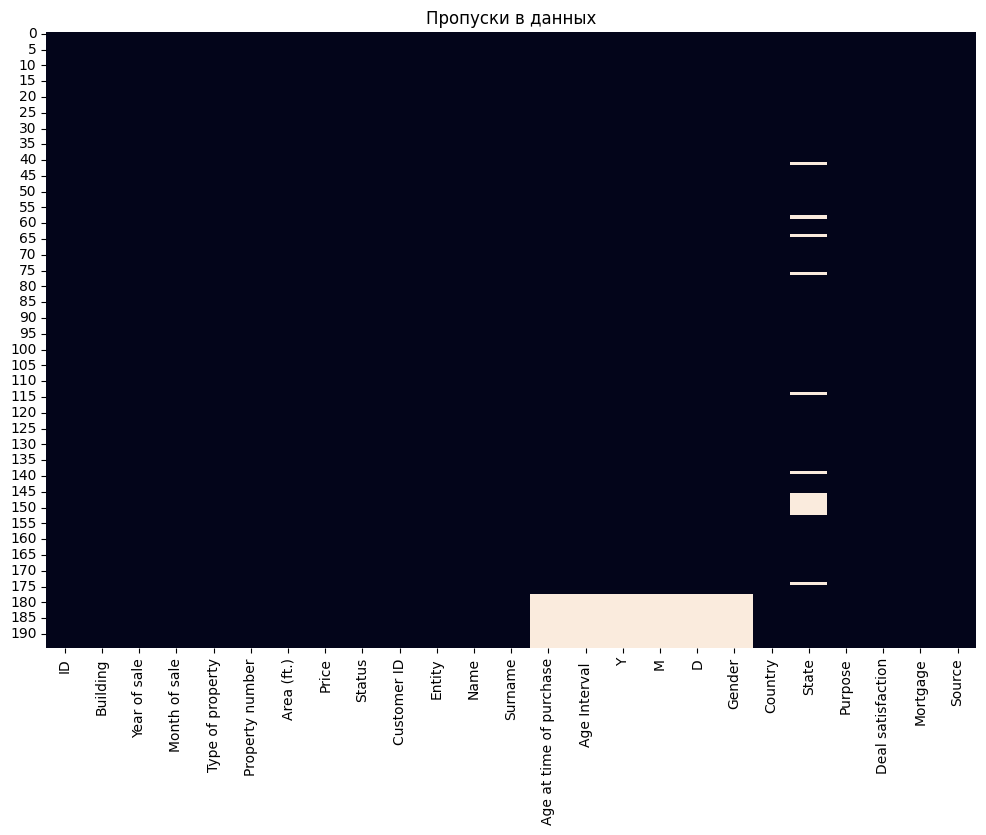

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Пропуски в данных')
plt.show()

Судя по графику, все эти пропуски связанны между собой (кроме state), и из это можем сделать вывод, что эту недвижимость скорее всего покупали юр лица

Теперь посмотрим, есть ли какая-то взаимосвязь пропусков в state.

In [6]:
df[df.isnull().any(axis=1)]

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
41,1032,1,2005,1,Apartment,32,782.25,"$ 215,410.28",Sold,C0015,...,1969.0,10.0,30.0,F,Belgium,NaN,Home,2,No,Agency
58,2025,2,2007,2,Apartment,25,927.83,"$ 315,733.15",Sold,C0070,...,1967.0,6.0,13.0,F,Russia,NaN,Home,1,No,Agency
64,2005,2,2006,9,Apartment,5,785.48,"$ 257,183.48",Sold,C0047,...,1965.0,1.0,11.0,F,Denmark,NaN,Investment,1,No,Agency
76,3049,3,2007,4,Apartment,49,1283.45,"$ 338,181.18",Sold,C0084,...,1965.0,5.0,12.0,M,Mexico,NaN,Home,3,No,Agency
114,2003,2,2006,12,Apartment,3,927.08,"$ 289,727.99",Sold,C0063,...,1955.0,12.0,2.0,M,Russia,NaN,Investment,3,No,Agency
139,3050,3,2006,11,Apartment,50,977.87,"$ 248,274.31",Sold,C0059,...,1949.0,6.0,22.0,F,Russia,NaN,Home,3,Yes,Agency
146,2019,2,2007,3,Apartment,19,649.80,"$ 177,555.06",Sold,C0079,...,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
147,2021,2,2007,4,Apartment,21,785.48,"$ 217,748.48",Sold,C0079,...,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
148,2027,2,2007,4,Apartment,27,785.48,"$ 247,739.44",Sold,C0079,...,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
149,2052,2,2007,3,Apartment,52,1615.29,"$ 484,458.03",Sold,C0079,...,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website


Можем заметить, что пропуски связаны с тем, что люди живут не в США и соответственно у них ничего и не может быть в графе State

Теперь посмотрим, насколько много у нас пропусков, относительно общего кол-ва данных

In [7]:
df.isnull().sum()/len(df)*100

ID                         0.000000
Building                   0.000000
Year of sale               0.000000
Month of sale              0.000000
Type of property           0.000000
Property number            0.000000
Area (ft.)                 0.000000
Price                      0.000000
Status                     0.000000
Customer ID                0.000000
Entity                     0.000000
Name                       0.000000
Surname                    0.000000
Age at time of purchase    8.717949
Age Interval               8.717949
Y                          8.717949
M                          8.717949
D                          8.717949
Gender                     8.717949
Country                    0.000000
State                      7.179487
Purpose                    0.000000
Deal satisfaction          0.000000
Mortgage                   0.000000
Source                     0.000000
dtype: float64

Видим 7-9%. Необходимо что-то с этим делать... 

# Работа с пропущенными значениями

- Для столбцов "Age at time of purchase", "Age Interval", "Y", "M", "D", "Gender", где тип данных object, NaN заменим на legal_entity, a где float - занулим
- Для state, заменим NaN на foreigner

In [8]:
nan_columns = ["Age at time of purchase", "Age Interval ", "Y", "M", "D", "Gender"]
for col in nan_columns:
    match df[col].dtype:
        case 'object': 
            df[col] = df[col].fillna('legal_entity')
        case 'float64': 
            df[col] = df[col].fillna(0)
df['State'] = df['State'].fillna('foreigner')

# EDA

для начала посмотрим распределение по полу

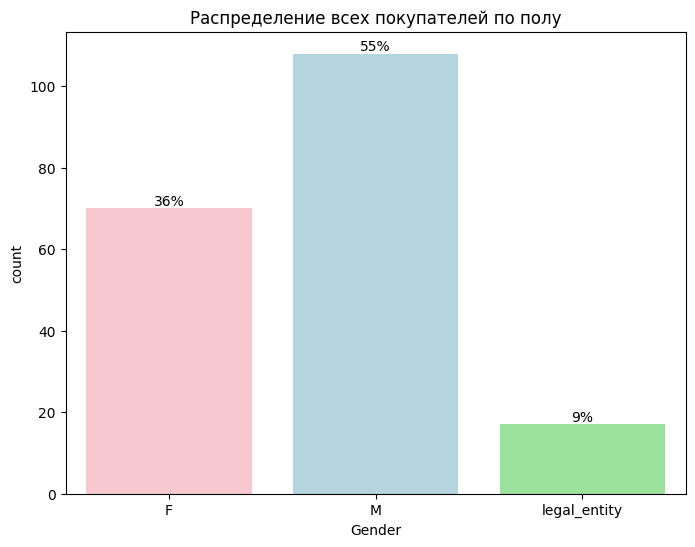

In [139]:
def cont_plt_annt(pl,data):
    for p in pl.patches:
        pl.annotate(f'{round((p.get_height() / len(data)) * 100)}%', # тут считаем процент
                    (p.get_x() + p.get_width() / 2., p.get_height()), # тут определяем позицию текста на графике
                    ha='center', va='bottom') #выравнивание текста

plt.figure(figsize=(8, 6))
graph = sns.countplot(x='Gender', data = df, hue='Gender', palette={'F': 'pink', 'M': 'lightblue', 'legal_entity': 'lightgreen'})
cont_plt_annt(graph, df)


plt.title('Распределение всех покупателей по полу')
plt.show()

Видим, что больше половины всех покупателей - мужчины

Запомним)

Теперь построим BubbleChart, где размер шарика, будет обозначать, сколько сколько всего денег отдали, по X возрастная группа, а по Y гендер

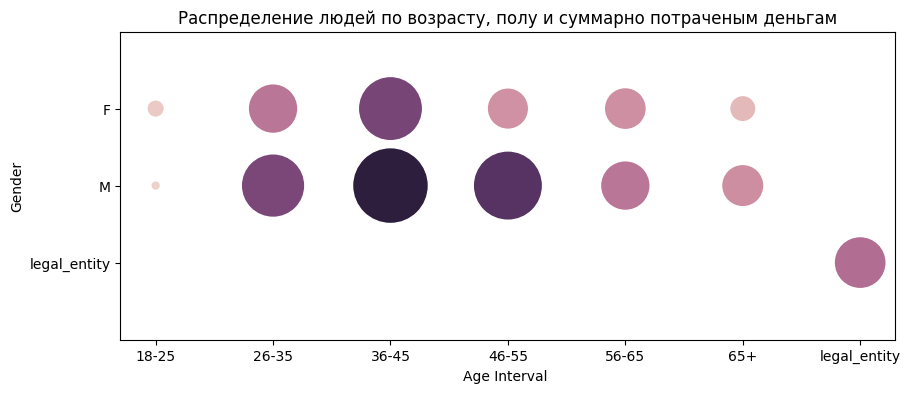

In [102]:
# Создание сводной таблицы
pivot_df = df.pivot_table(index='Age Interval ', columns='Gender', values='Price', aggfunc='sum').reset_index()

#Преобразуем сводную таблицу, чтобы построить по ней bubblechart
bubble_df = pivot_df.melt(id_vars='Age Interval ', value_vars=['legal_entity', 'M', 'F'], var_name='Gender', value_name='Price')

# Создание bubble chart
plt.figure(figsize=(10, 4))
bubble_plot = sns.scatterplot(data=bubble_df, x='Age Interval ', y='Gender', size='Price', sizes=(50, 3000), hue='Price', legend=False)

# Настройка графика
plt.ylim(-1,3)
plt.title('Распределение людей по возрасту, полу и суммарно потраченым деньгам')
plt.show()

Тут мы можем заметить, что больше всего денег нам приносят мужчины, в возрасте от 36 до 45

Так же можно заметить интересный момент, если построить такой же график, но взять средний чек, за размер шарика

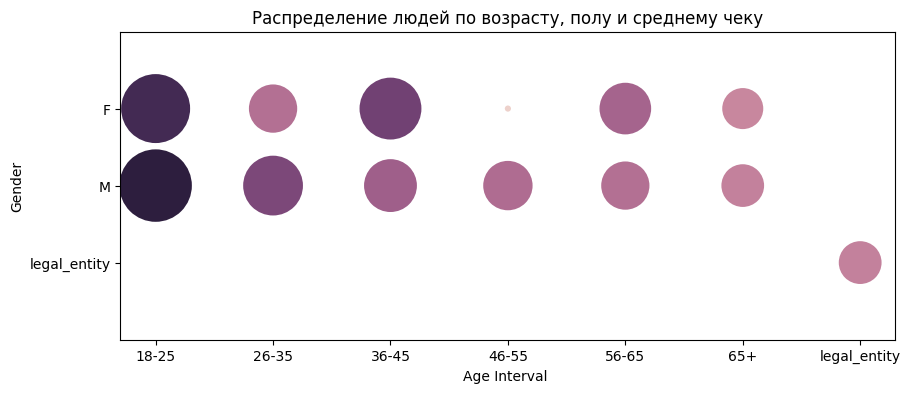

In [104]:
pivot_df = df.pivot_table(index='Age Interval ', columns='Gender', values='Price', aggfunc='mean').reset_index()
bubble_df = pivot_df.melt(id_vars='Age Interval ', value_vars=['legal_entity', 'M', 'F'], var_name='Gender', value_name='Price')
plt.figure(figsize=(10, 4))
bubble_plot = sns.scatterplot(data=bubble_df, x='Age Interval ', y='Gender', size='Price', sizes=(50, 3000), hue='Price', legend=False)
plt.ylim(-1,3)
plt.title('Распределение людей по возрасту, полу и среднему чеку')
plt.show()

Средний чек получается намного больше у молодых, но почему?

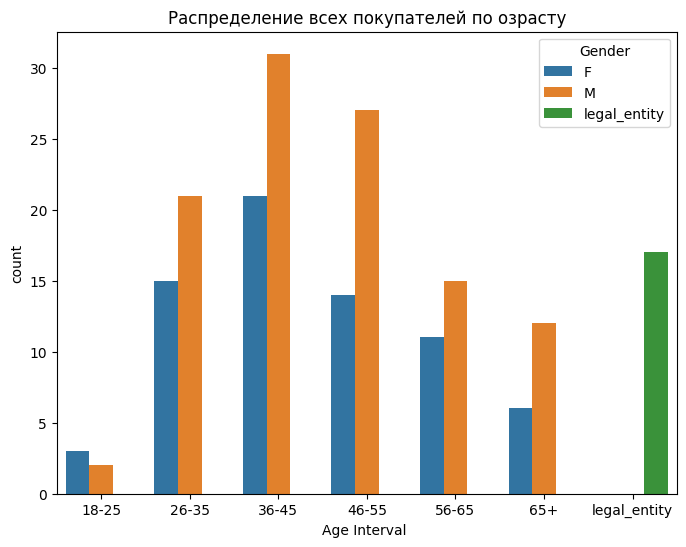

In [120]:
plt.figure(figsize=(8, 6))
graph = sns.countplot(x='Age Interval ', hue ='Gender', data = df)

plt.title('Распределение всех покупателей по озрасту')
plt.show()

А это обьясняется тем, что 'мололдежи' минимальное кол-во и из этого же графика мы можем увидеть, что людей в возрасте 36 до 45 больше всего, и из них больше всего мужчин.

Можем сделать вывод, что туда нам и надо 'копать' (мужчины 36-45, так как их больше, и они приносят больше всего денег, что приоритетно)

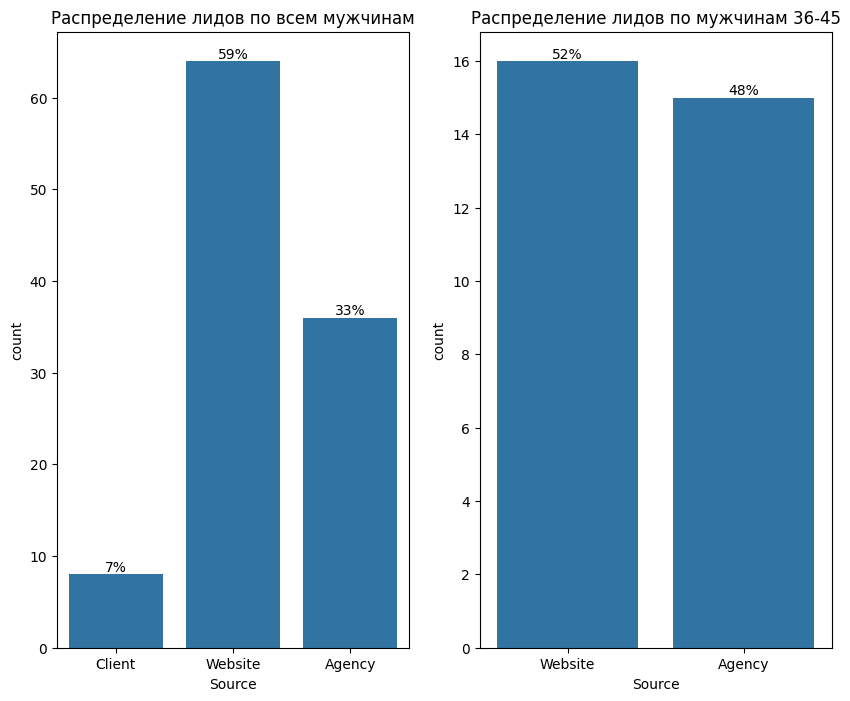

In [140]:
# создаем новый датафрейм, по которому будем дальше работать
man_df = df[df['Gender'] == 'M']
man_36_45_df = df[(df['Age Interval '] == '36-45') & (df['Gender'] == 'M')]


plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt1 = sns.countplot(x='Source', data = man_df)
plt.title('Распределение лидов по всем мужчинам')
cont_plt_annt(plt1, man_df)

plt.subplot(1, 2, 2)
plt2= sns.countplot(x='Source', data = man_36_45_df)
plt.title('Распределение лидов по мужчинам 36-45')
cont_plt_annt(plt2, man_36_45_df)

plt.show()

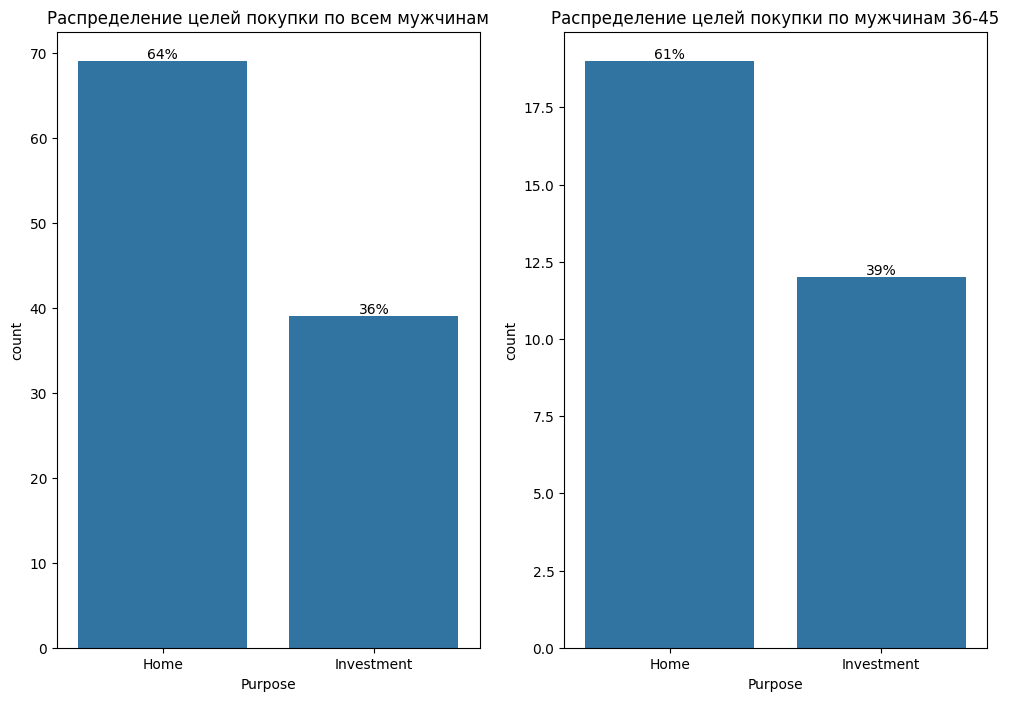

In [141]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt1 = sns.countplot(x='Purpose', data = man_df)
plt.title('Распределение целей покупки по всем мужчинам')
cont_plt_annt(plt1,man_df)

plt.subplot(1, 2, 2)
plt2 = sns.countplot(x='Purpose', data = man_36_45_df)
plt.title('Распределение целей покупки по мужчинам 36-45')
cont_plt_annt(plt2, man_36_45_df)

plt.show()

Text(0.5, 1.0, 'Распределение стоимости \n недвижимости для мужчин 36-45')

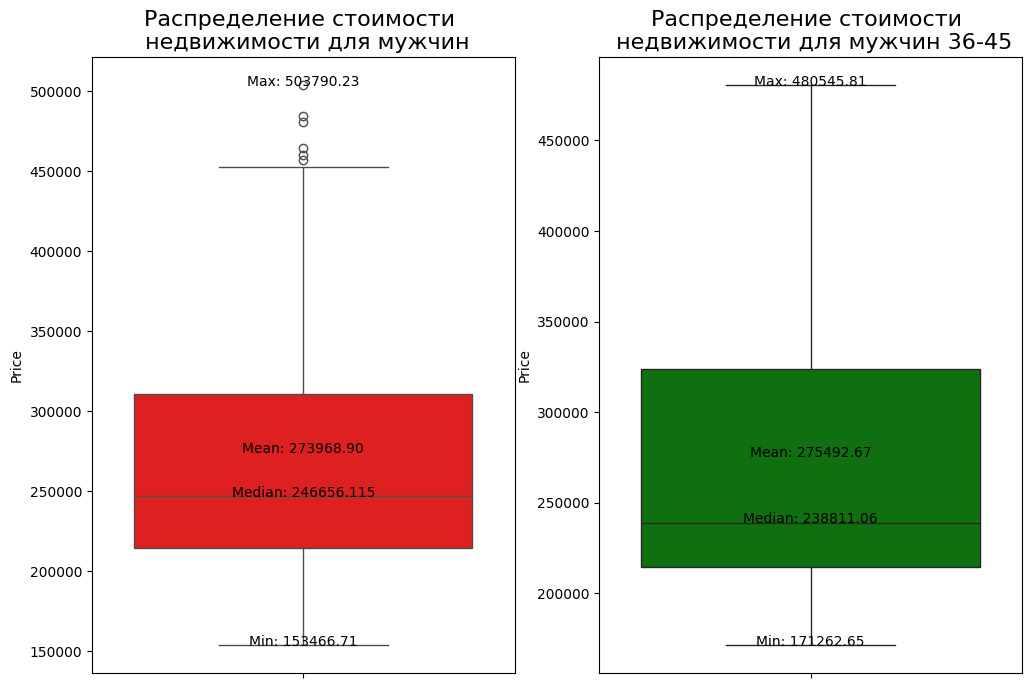

In [165]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt1 = sns.boxplot(data=man_df['Price'], color='red', legend = 'brief')
# Вычисляем статистики
stats = man_df.groupby('Gender')['Price'].agg(['min', 'max', 'mean', 'median']).reset_index()
# Добавление аннотаций
for i in range(len(stats)):
    plt1.text(i, stats['min'][i], f'Min: {stats["min"][i]}', horizontalalignment='center')
    plt1.text(i, stats['max'][i], f'Max: {stats["max"][i]}', horizontalalignment='center')
    plt1.text(i, stats['mean'][i], f'Mean: {stats["mean"][i]:.2f}', horizontalalignment='center')
    plt1.text(i, stats['median'][i], f'Median: {stats["median"][i]}', horizontalalignment='center')

plt.title('Распределение стоимости \n недвижимости для мужчин', fontsize=16)


plt.subplot(1, 2, 2)
plt2 = sns.boxplot(data=man_36_45_df['Price'], color='green', legend = 'brief')
# Вычисляем статистики
stats = man_36_45_df.groupby('Gender')['Price'].agg(['min', 'max', 'mean', 'median']).reset_index()
# Добавление аннотаций
for i in range(len(stats)):
    plt2.text(i, stats['min'][i], f'Min: {stats["min"][i]}', horizontalalignment='center')
    plt2.text(i, stats['max'][i], f'Max: {stats["max"][i]}', horizontalalignment='center')
    plt2.text(i, stats['mean'][i], f'Mean: {stats["mean"][i]:.2f}', horizontalalignment='center')
    plt2.text(i, stats['median'][i], f'Median: {stats["median"][i]}', horizontalalignment='center')
plt.title('Распределение стоимости \n недвижимости для мужчин 36-45', fontsize=16)

C:\Users\user\AppData\Local\Temp\ipykernel_11420\4291582579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_df['Area (m2.)'] = man_df['Area (ft.)'] * 0.09290304
C:\Users\user\AppData\Local\Temp\ipykernel_11420\4291582579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_36_45_df['Area (m2.)'] = man_36_45_df['Area (ft.)'] * 0.09290304


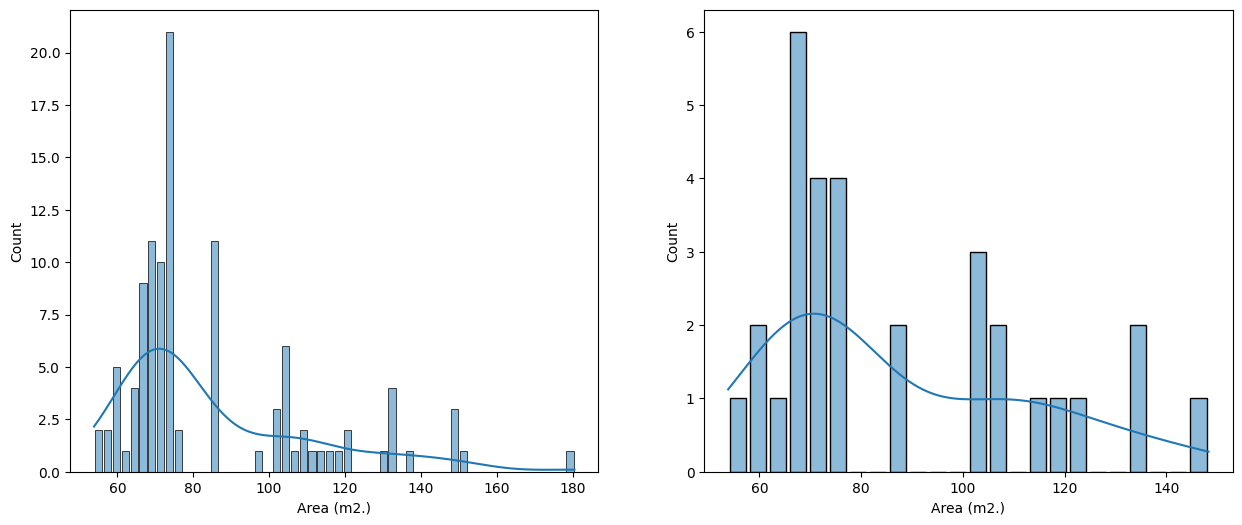

In [203]:
man_df['Area (m2.)'] = man_df['Area (ft.)'] * 0.09290304
man_36_45_df['Area (m2.)'] = man_36_45_df['Area (ft.)'] * 0.09290304

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt1 = sns.histplot(data = man_df['Area (m2.)'], bins = len(man_df['Area (m2.)'].value_counts()), kde=True, shrink=.8)

plt.subplot(1, 2, 2)
plt1 = sns.histplot(data = man_36_45_df['Area (m2.)'], bins = len(man_36_45_df['Area (m2.)'].value_counts()), kde=True, shrink=.8)

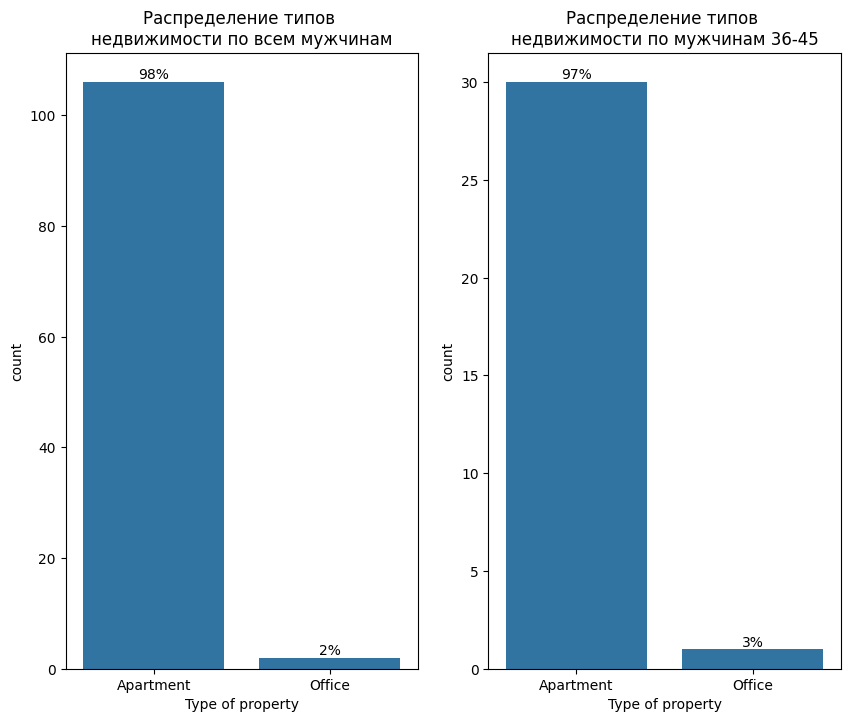

In [206]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt1 = sns.countplot(x='Type of property', data = man_df)
plt.title('Распределение типов \nнедвижимости по всем мужчинам')
cont_plt_annt(plt1, man_df)

plt.subplot(1, 2, 2)
plt2= sns.countplot(x='Type of property', data = man_36_45_df)
plt.title('Распределение типов \nнедвижимости по мужчинам 36-45')
cont_plt_annt(plt2, man_36_45_df)

plt.show()

# Выводы

В ходе анализа было построен типовой портрет нашего клиента:
- Мужчина
- Возраст 36-45
- Почти всегда (97%) покупает жилищное помощение
- Площадь чаще всего выбирает в районе 70-74 кв.м
- Средний чек у мужчин 36-45 - 275492.67$
- Цель покупки чаще всего, как собственное жилье, но нельзя сказать что намного чаще (61% - дом, 39% - инвестиции)
- Источник лида, для этой категории людей примерно равно рампределен, веб-сайт - 52%, агентство - 48%